# Fit the DDM on hierarchical data

In [1]:
import rlssm
import pandas as pd
import os

## Import the data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)

data['block_label'] += 1

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0
1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0
2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0
3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0
4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0


## Initialize the model

In [3]:
model = rlssm.DDModel(hierarchical_levels = 2)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e51a7e834f83bc3d1e730098b573fd71 NOW.


In [4]:
model.family, model.model_label, model.hierarchical_levels

('DDM', 'hierDDM', 2)

In [5]:
model.starting_point_bias

False

## Fit

In [6]:
# sampling parameters
n_iter = 6000
n_chains = 2
n_thin = 1

# bayesian model
drift_priors = {'mu_mu':1, 'sd_mu':1, 'mu_sd':0, 'sd_sd':1}
threshold_priors = {'mu_mu':-1, 'sd_mu':.5, 'mu_sd':0, 'sd_sd':1}
ndt_priors = {'mu_mu':-2, 'sd_mu':.5, 'mu_sd':0, 'sd_sd':1}

In [7]:
model_fit = model.fit(
    data,
    drift_priors=drift_priors,
    threshold_priors=threshold_priors,
    ndt_priors=ndt_priors,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains,
    verbose = False)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0.0 of 6000 iterations ended with a divergence (0.0%)
0 of 6000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


In [8]:
model_fit.rhat.describe()

,rhat
count,87.000000
mean,1.001910
std,0.001985
min,0.999805
25%,1.000574
50%,1.001143
75%,1.002499
max,1.008218


### get Rhat

In [9]:
model_fit.rhat.head()

,rhat,variable
0,1.002509,mu_drift
1,1.001339,mu_threshold
2,1.002303,mu_ndt
3,1.000422,sd_drift
4,1.002649,sd_threshold


### calculate wAIC

In [10]:
model_fit.waic

{'lppd': -5411.458648821632,
 'p_waic': 100.73423332846733,
 'waic': 11024.385764300197,
 'waic_se': 176.54753768837392}

## Posteriors

In [27]:
model_fit.samples.describe()

,chain,draw,transf_mu_drift,transf_mu_threshold,transf_mu_ndt,drift_sbj[1],drift_sbj[2],drift_sbj[3],drift_sbj[4],drift_sbj[5],...,ndt_sbj[18],ndt_sbj[19],ndt_sbj[20],ndt_sbj[21],ndt_sbj[22],ndt_sbj[23],ndt_sbj[24],ndt_sbj[25],ndt_sbj[26],ndt_sbj[27]
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.500000,1499.500000,0.900044,1.808564,0.731719,1.129506,0.798836,0.988965,0.722340,0.789940,...,0.730284,0.387422,0.917430,0.746179,0.742048,0.582357,0.739037,0.853310,0.465304,0.863066
std,0.500042,866.097533,0.057757,0.056391,0.028836,0.093497,0.086797,0.092666,0.071049,0.080940,...,0.010814,0.013713,0.011916,0.016996,0.013553,0.015675,0.011080,0.009402,0.005694,0.014037
min,0.000000,0.000000,0.702277,1.597039,0.612157,0.802428,0.405192,0.669093,0.422960,0.491381,...,0.679966,0.328096,0.841147,0.662137,0.678145,0.501056,0.690381,0.808933,0.434268,0.796362
25%,0.000000,749.750000,0.862070,1.770975,0.713302,1.066418,0.741424,0.925628,0.674011,0.734373,...,0.723551,0.378965,0.910114,0.735256,0.733627,0.572918,0.732186,0.847434,0.461821,0.854380
50%,0.500000,1499.500000,0.899052,1.809341,0.731975,1.129973,0.798617,0.988921,0.722302,0.789778,...,0.731182,0.388427,0.918420,0.747349,0.743006,0.583560,0.739644,0.853885,0.465847,0.864175
75%,1.000000,2249.250000,0.937604,1.846443,0.750382,1.192932,0.857775,1.051650,0.770768,0.845275,...,0.737985,0.397056,0.925834,0.758120,0.751537,0.593252,0.746856,0.859927,0.469358,0.872654
max,1.000000,2999.000000,1.146913,2.019451,0.850561,1.504020,1.139239,1.341568,0.987439,1.079516,...,0.758013,0.424539,0.947338,0.800347,0.783848,0.622169,0.772715,0.878593,0.480447,0.901312


In [28]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

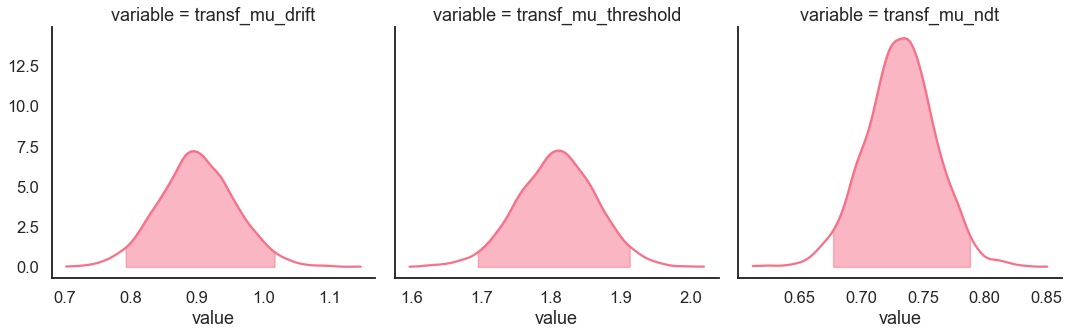

In [29]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

### Ungrouped

In [16]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.828125,1.465809,1.866699,0.894772,1.092244,1.284075,1.574807,2.206188,0.939774,1.113169,1.305374,1.594126,2.225529
2,0.840037,1.476402,2.014461,0.905555,1.096581,1.275516,1.601257,2.271440,0.933592,1.111401,1.304256,1.594895,2.259090
3,0.827816,1.469306,2.087108,0.875012,1.060547,1.232472,1.537545,2.184161,0.946770,1.125288,1.314944,1.599632,2.232770
4,0.823948,1.468386,2.178109,0.931408,1.112478,1.294634,1.558363,2.191108,0.939645,1.119013,1.308263,1.595892,2.215139
5,0.829208,1.471764,2.142610,0.919316,1.089903,1.276600,1.610557,2.281698,0.936377,1.114582,1.297726,1.576988,2.217879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.840347,1.481090,2.088584,0.886794,1.085096,1.272832,1.572990,2.288796,0.938386,1.125586,1.318357,1.600840,2.265116
97,0.833075,1.485162,2.137398,0.889106,1.086529,1.301670,1.583724,2.187626,0.946341,1.124506,1.325966,1.606551,2.239496
98,0.833849,1.481160,2.206970,0.897227,1.098927,1.287202,1.595046,2.262284,0.942685,1.123574,1.314341,1.602917,2.248512


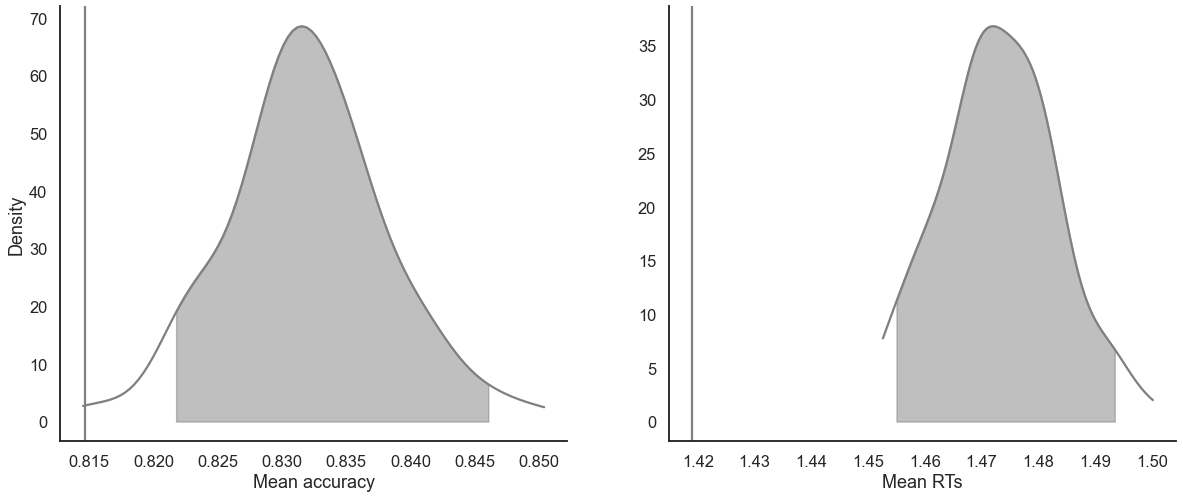

In [30]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

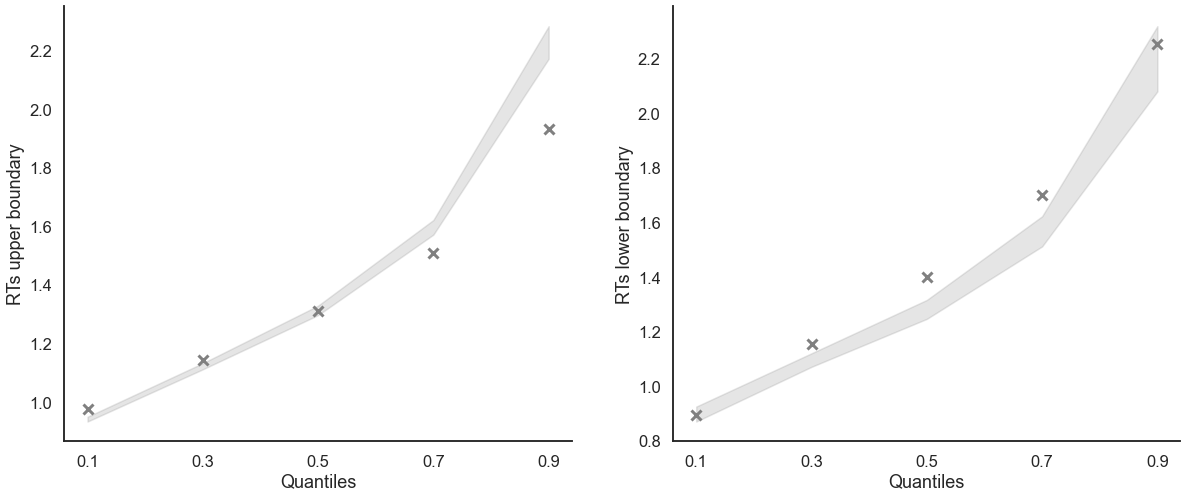

In [31]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

### Grouped

In [19]:
import numpy as np

In [20]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [21]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_neg,accuracy_flipped,choice_pair,block_bins
0,0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0,-1,1.0,AB,1
1,1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0,1,-0.0,CD,1
2,2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0,-1,1.0,BD,1
3,3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0,-1,1.0,CD,1
4,4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0,1,-0.0,CD,1


In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1            0.832402  1.444663  1.588320   
                        2            0.852886  1.439888  1.721191   
                        3            0.824953  1.474794  2.193323   
                        4            0.791434  1.475383  1.919096   
                        5            0.862197  1.435426  2.289228   
...                                       ...       ...       ...   
3.0         CD          96           0.831481  1.451417  1.764525   
                        97           0.831481  1.512905  1.963335   
                        98           0.842593  1.447810  3.464916   
                        99           0.844444  1.430842  1.588691   
                        100          0.846296  1.454187  1.742115   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1.0         AB          1              1.095287        1.125363   
                        2              1.117626        1.096485   
                        3              1.166697        1.136505   
                        4              1.140079        1.127444   
                        5              1.048409        1.093472   
...                                         ...             ...   
3.0         CD          96             1.116450        1.125669   
                        97             1.099653        1.124859   
                        98             1.046925        1.116957   
                        99             1.087880        1.118688   
                        100            1.095295        1.115131   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1.0         AB          1              1.281378        1.307140   
                        2              1.298903        1.293988   
                        3              1.364953        1.300124   
                        4              1.292660        1.309360   
                        5              1.227480        1.270233   
...                                         ...             ...   
3.0         CD          96             1.277047        1.294450   
                        97             1.334752        1.327444   
                        98             1.195400        1.322351   
                        99             1.216355        1.277754   
                        100            1.268893        1.323503   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1.0         AB          1              1.531399        1.582110  
                        2              1.569693        1.588208  
                        3              1.559777        1.556593  
                        4              1.555227        1.605574  
                        5              1.575709        1.578905  
...                                         ...             ...  
3.0         CD          96             1.524143        1.571531  
                        97             1.620578        1.629897  
                        98             1.408719        1.565606  
                        99             1.459365        1.562374  
                        100            1.471753        1.575333  

[1200 rows x 9 columns]

In [23]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.816049  1.474332  1.576800         1.147820   
           2            0.824691  1.503281  3.165260         1.127446   
           3            0.819753  1.455545  1.718183         1.070398   
           4            0.843210  1.496646  2.048743         1.105886   
           5            0.835802  1.522032  2.653628         1.047329   
...                          ...       ...       ...              ...   
8          96           0.843829  1.484962  2.194925         1.111920   
           97           0.819899  1.468143  2.033356         1.073145   
           98           0.838791  1.514160  2.208197         1.103438   
           99           0.857683  1.447709  2.042878         1.040207   
           100          0.836272  1.496444  2.131367         1.055253   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.140275         1.292188        1.336428   
           2             1.098860         1.321847        1.301363   
           3             1.132645         1.252465        1.321226   
           4             1.127366         1.299418        1.318750   
           5             1.120769         1.292049        1.329082   
...                           ...              ...             ...   
8          96            1.139788         1.240118        1.298523   
           97            1.095239         1.274389        1.310825   
           98            1.123166         1.265091        1.373294   
           99            1.092796         1.210985        1.288174   
           100           1.163719         1.258951        1.365551   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.486357        1.627140  
           2              1.620555        1.591536  
           3              1.539780        1.579324  
           4              1.565717        1.599015  
           5              1.521270        1.684321  
...                            ...             ...  
8          96             1.444753        1.620402  
           97             1.526280        1.598495  
           98             1.580059        1.650565  
           99             1.522154        1.567424  
           100            1.422530        1.618079  

[800 rows x 9 columns]

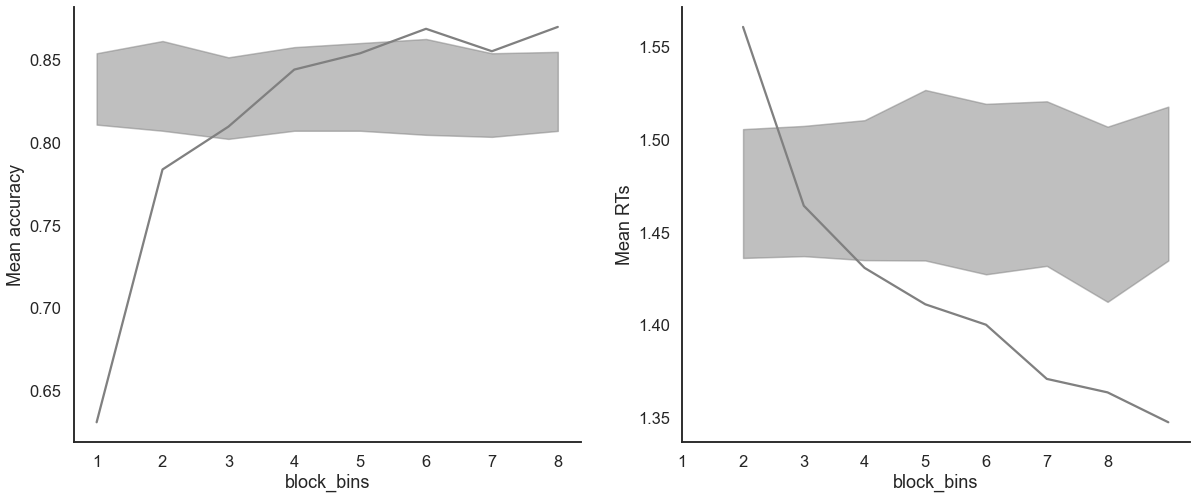

In [32]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

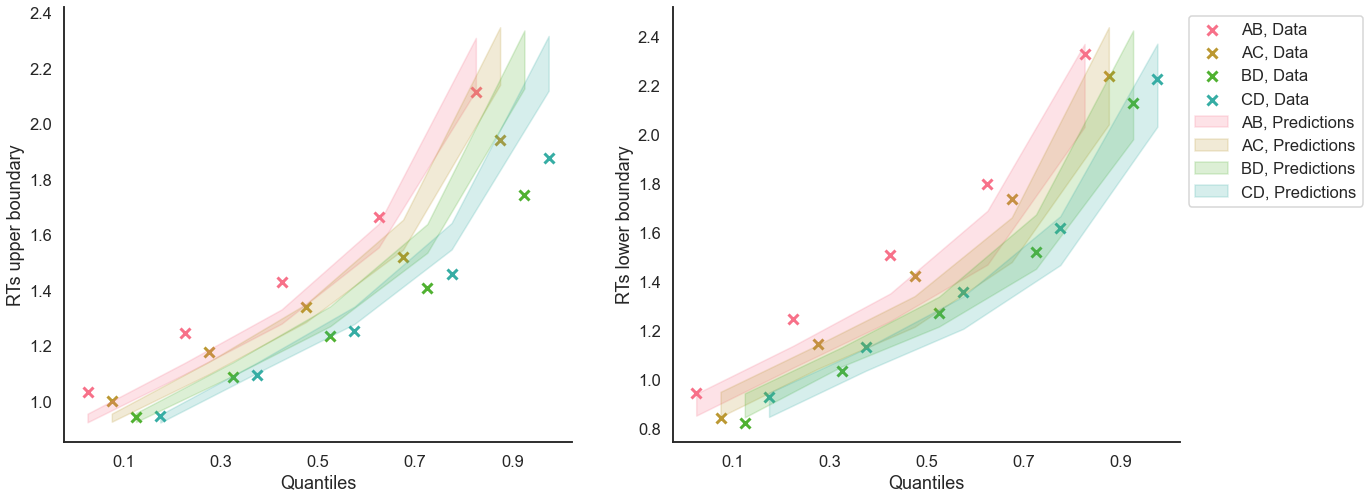

In [33]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);